In [20]:
import os
import xml.etree.ElementTree as ET 
import cv2 as cv
from PIL import Image
import random 
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import filters
import numpy as np
from skimage import  exposure

In [46]:
image_dir = "Images/"
annotation_dir = "Annotations/"

In [47]:
classes = os.listdir(image_dir)

# Q2

## (a) 
Cropping and Resize Images in Your 4-class Images Dataset

In [45]:
def resize_crop_image(image_path,image_filename,annotation_path,annotation_filename):
    bnd_box = [] 
    im = Image.open(os.path.join(image_path,image_filename))
    annotation = ET.parse(os.path.join(annotation_path,annotation_filename))
    annotation_root =  annotation.getroot()
    for child in annotation_root.findall('object')[0].findall('bndbox')[0]:
        # print(child.tag,child.text)
        bnd_box.append(int(child.text))
    im = im.crop(bnd_box)
    im = im.resize((128,128))
    return im

In [50]:
new_dir = "Processed/"
if not os.path.exists(new_dir):
    os.mkdir(new_dir)   
for class_ in classes:
    image_class_path = os.path.join(image_dir,class_)
    annotation_class_path = os.path.join(annotation_dir,class_)
    images = os.listdir(image_class_path)
    annotations = os.listdir(annotation_class_path)
    new_class_dir = os.path.join("Processed/",class_)
    if not os.path.exists(new_class_dir):
        os.mkdir(new_class_dir)
    for image_filename ,annotation_filename in zip(images,annotations):
        im = resize_crop_image(image_class_path,image_filename,annotation_class_path,annotation_filename)
        im.save(os.path.join(new_class_dir,image_filename))
   

## (b)
Image Processing

In [65]:
processed_class = os.listdir("Processed")
images_to_convert =[]
for class_ in processed_class:
    filenames = random.choices(os.listdir(os.path.join("Processed",class_)),k=2)
    for filename in filenames:
        images_to_convert.append(os.path.join(class_,filename))
    

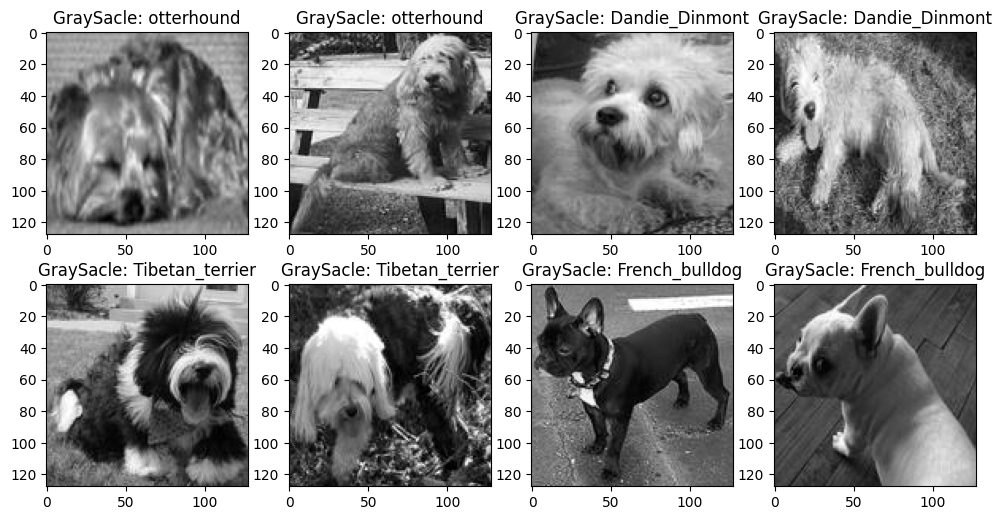

In [82]:
fig, axes = plt.subplots(2,4, figsize=(12,6))
for ax,filename in zip(axes.flat,images_to_convert):
    img = cv.imread(os.path.join("Processed",filename))
    gray_sacle = rgb2gray(img)
    # ax[0].imshow(img)
    ax.imshow(gray_sacle, cmap=plt.cm.gray)
    # ax[0].set_title("Orginal: " + filename.split("\\")[0].split("-")[-1])
    ax.set_title("GraySacle: " + filename.split("\\")[0].split("-")[-1])  
plt.show()

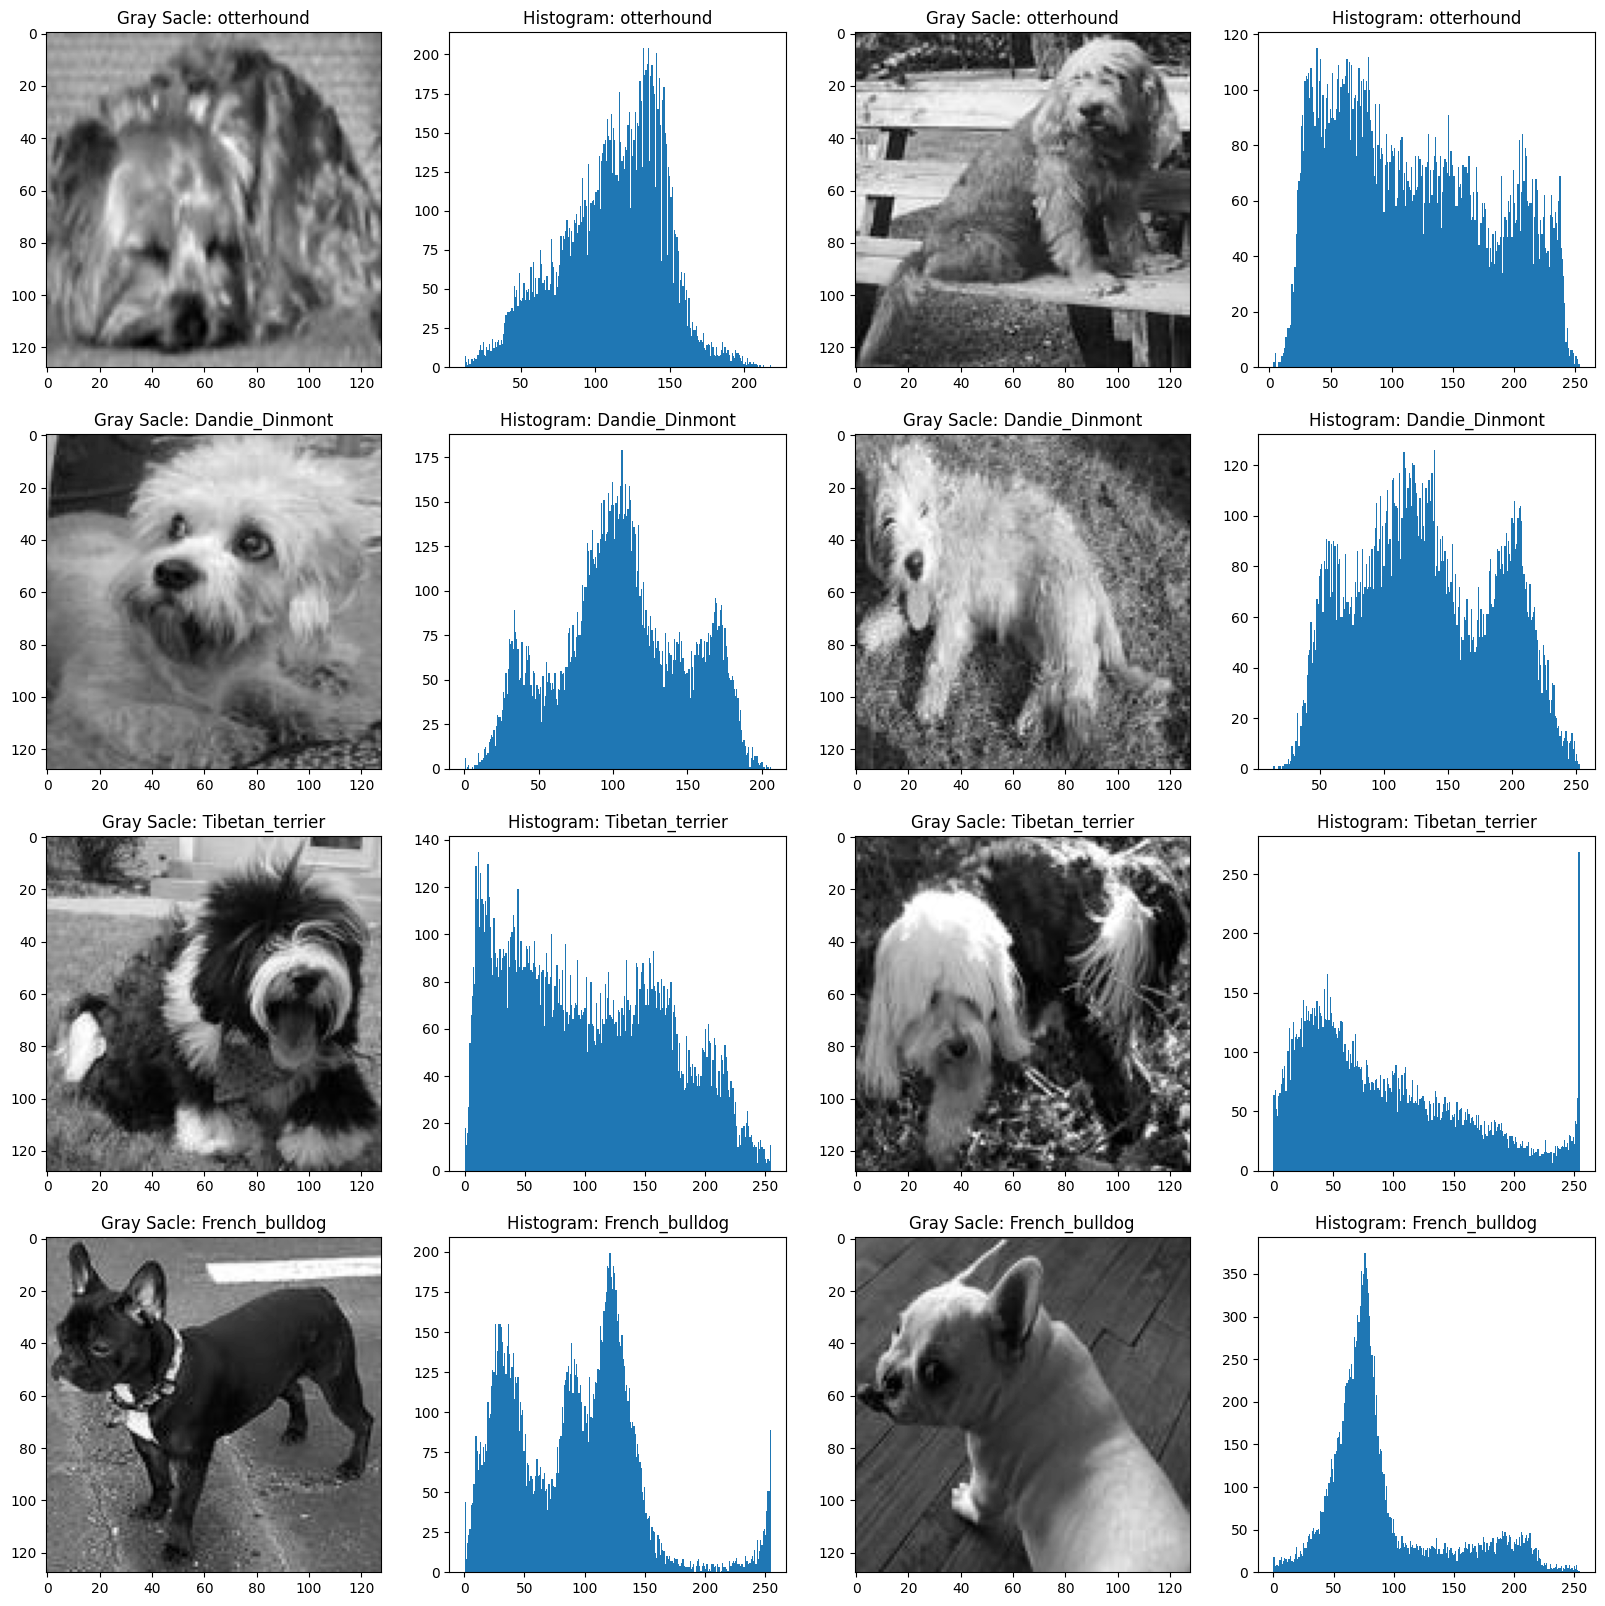

In [87]:
fig, axes = plt.subplots(4,4, figsize=(20,20))
ax = axes.flat
c =0
for i in range(len(images_to_convert)):
    img = cv.imread(os.path.join("Processed",images_to_convert[i]))
    gray_sacle = rgb2gray(img)
    ax[c].imshow(gray_sacle,cmap=plt.cm.gray)
    ax[c+1].hist((gray_sacle*255).reshape(1,128*128)[0],bins=256)
    ax[c].set_title("Gray Sacle: "+images_to_convert[i].split("\\")[0].split("-")[-1])
    ax[c+1].set_title("Histogram: "+images_to_convert[i].split("\\")[0].split("-")[-1])  
    c+=2
plt.show()

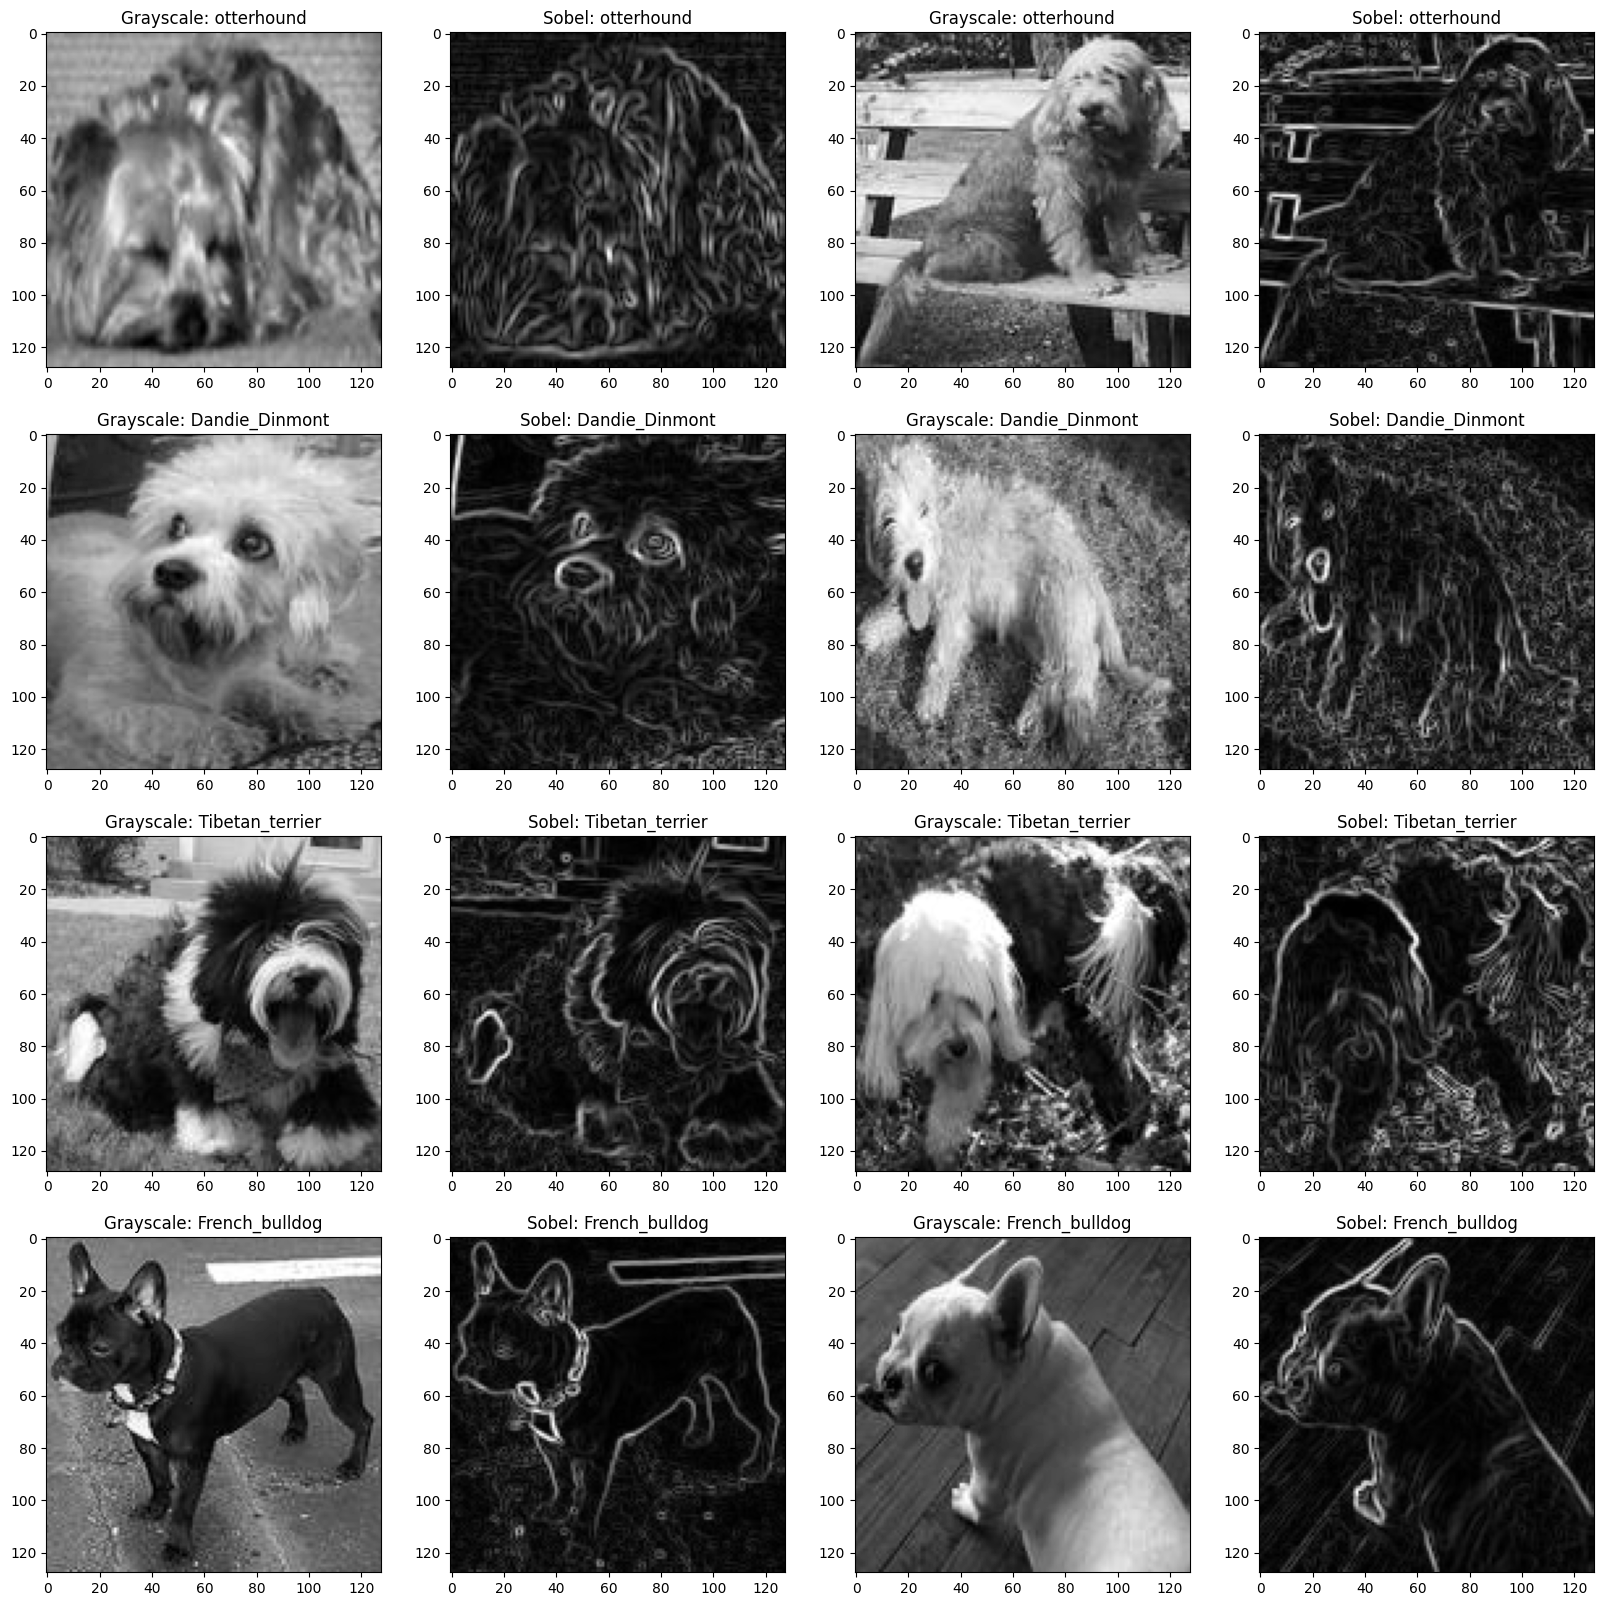

In [88]:
fig, axes = plt.subplots(4,4, figsize=(20,20))
ax=axes.flat
c =0
for i in range(len(images_to_convert)):
    img = cv.imread(os.path.join("Processed",images_to_convert[i]))
    gray_sacle = rgb2gray(img)
    edge_sobel = filters.sobel(gray_sacle)
    ax[c].imshow(gray_sacle, cmap=plt.cm.gray)
    ax[c+1].imshow(edge_sobel,cmap=plt.cm.gray)
    ax[c].set_title("Grayscale: "+images_to_convert[i].split("\\")[0].split("-")[-1])
    ax[c+1].set_title("Sobel: "+images_to_convert[i].split("\\")[0].split("-")[-1])  
    c+=2
plt.show()

## (c)
Edge histogram

In [89]:
processed_class = os.listdir("Processed")
images_to_angle =[]
for class_ in processed_class:
    filenames = random.choices(os.listdir(os.path.join("Processed",class_)),k=1)
    for filename in filenames:
        images_to_angle.append(os.path.join(class_,filename))

In [90]:
def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

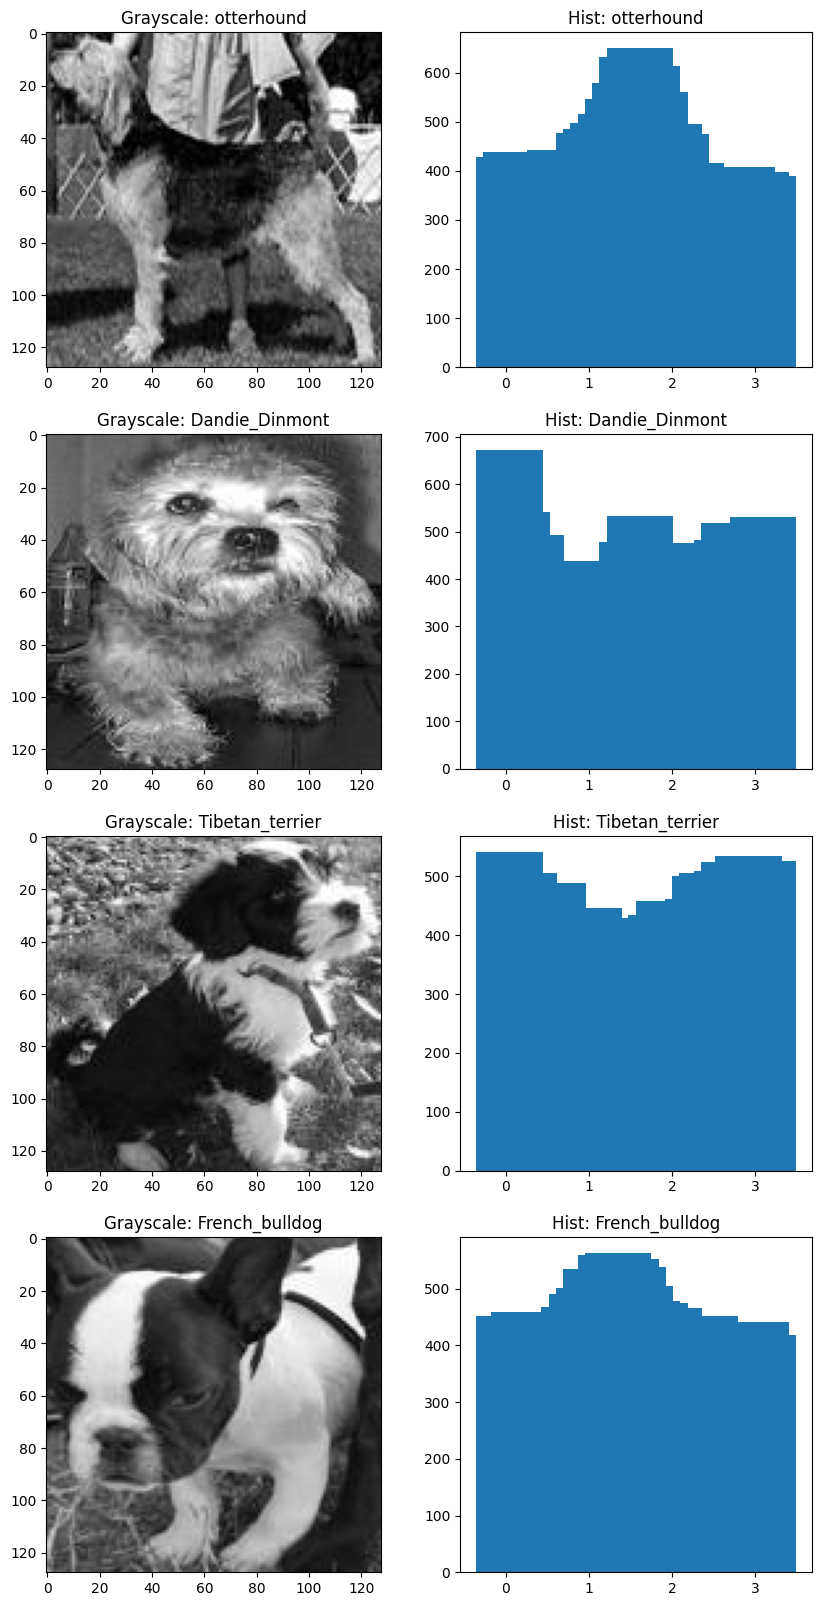

In [100]:
fig, axes = plt.subplots(4,2, figsize=(10,20))
ax=axes.flat
c =0
for i in range(len(images_to_angle)):
    img = cv.imread(os.path.join("Processed",images_to_angle[i]))
    gray_sacle = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(gray_sacle),
                    filters.sobel_v(gray_sacle))
    hist,bins = exposure.histogram(angle_sobel,nbins=36)
  
    ax[c].imshow(gray_sacle, cmap=plt.cm.gray)
    ax[c+1].bar(bins,hist)
    ax[c].set_title("Grayscale: "+images_to_angle[i].split("\\")[0].split("-")[-1])
    ax[c+1].set_title("Hist: "+images_to_angle[i].split("\\")[0].split("-")[-1])  
    c+=2
plt.show()

## (d)
Histogram Comparison (Measures of Similarity and Dissimilarity)

In [194]:
processed_class = os.listdir("Processed")
class_one_images = random.choices(os.listdir(os.path.join("Processed",processed_class[0])),k=2)
class_two_images = random.choices(os.listdir(os.path.join("Processed",processed_class[-1])),k=1)

In [195]:
class_one_hist = []
class_two_hist = []

In [196]:
for filename in class_one_images:
    temp_path = os.path.join("Processed",processed_class[0])
    print(temp_path+filename)
    img = cv.imread(os.path.join(temp_path,filename))
    gray_sacle = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(gray_sacle),
                    filters.sobel_v(gray_sacle))
    hist,bins = exposure.histogram(angle_sobel,nbins=36)
    class_one_hist.append((hist,bins))

Processed\n02091635-otterhoundn02091635_386.jpg
Processed\n02091635-otterhoundn02091635_470.jpg


In [197]:
for filename in class_two_images:
    temp_path = os.path.join("Processed",processed_class[-1])
    print(temp_path+filename)
    img = cv.imread(os.path.join(temp_path,filename))
    gray_sacle = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(gray_sacle),
                    filters.sobel_v(gray_sacle))
    hist,bins = exposure.histogram(angle_sobel,nbins=36)
    class_two_hist.append((hist,bins))

Processed\n02108915-French_bulldogn02108915_5367.jpg


In [198]:
def euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [201]:
def manhattan_distance(x,y):
    return np.sum(abs(x-y))

In [ ]:
def cosine_distance(x,y):
    return np.sum(x+y)/(np.sqrt(np.sum(x**2))*np.sqrt(np.sum(y**2)))

In [210]:
print("Euclidean Distannce same class: ",euclidean_distance(class_one_hist[0][1],class_one_hist[1][1]))
print("Euclidean Distannce diffrent class: ",euclidean_distance(class_one_hist[0][1],class_two_hist[0][1]))

Euclidean Distannce same class:  2.0520480936510386e-15
Euclidean Distannce diffrent class:  6.7358331561378e-05


In [211]:
print("Manhattan distance same class :",manhattan_distance(class_one_hist[0][1],class_one_hist[1][1]))
print("Manhattan distance diffrent class :",manhattan_distance(class_one_hist[0][1],class_two_hist[0][1]))

Manhattan distance same class : 9.832412661836543e-15
Manhattan distance diffrent class : 0.00035003792073393797


In [212]:
print("Cosine distance same class: ",cosine_distance(class_one_hist[0][1],class_one_hist[1][1]))
print("Cosine distance different class: ",cosine_distance(class_one_hist[0][1],class_two_hist[0][1]))


Cosine distance same class:  0.955113901202067
Cosine distance different class:  0.9551168573119698


## (e)
Histogram of Oriented Gradient (HOG) feature descriptor

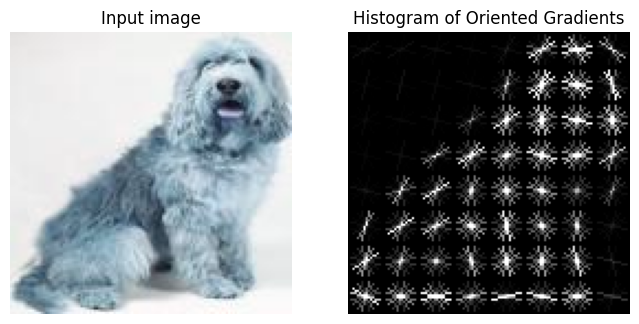

In [215]:
from skimage.feature import hog

image = cv.imread("Processed/n02091635-otterhound/n02091635_2.jpg")

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## (f)
Dimensionality reduction (using Principal Component Analysis, PCA)

In [237]:
processed_class = os.listdir("Processed")[:2]

In [217]:
import pandas as pd

In [233]:
columns=[i for i in range(36)] + ["label"]

In [240]:
df = pd.DataFrame(columns=columns)
for class_ in processed_class:
    class_path = os.path.join("Processed",class_)
    for filename in os.listdir(class_path):
        img = cv.imread(os.path.join(class_path,filename))
        gray_sacle = rgb2gray(img)
        angle_sobel = angle(filters.sobel_h(gray_sacle),
                        filters.sobel_v(gray_sacle))
        hist,bins = exposure.histogram(angle_sobel,nbins=36)
        df.loc[len(df)] = list(hist)+[class_.split("-")[-1]]
        
    
    

In [242]:
X_train = np.array(df[df.columns[:-1]])

In [243]:
from sklearn.decomposition import PCA

In [244]:
pca = PCA(n_components=2)

In [245]:
data_pca = pca.fit_transform(X_train)

In [246]:
df_pca = pd.DataFrame(data_pca)

In [248]:
df_pca['label'] = df['label']

In [249]:
import seaborn as sns

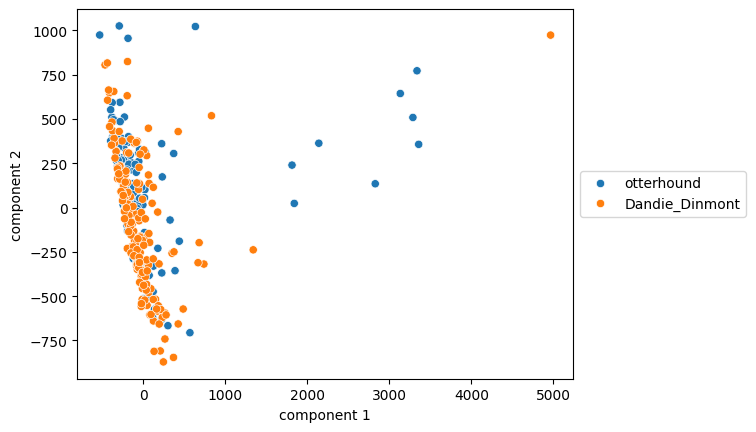

In [250]:
sns.scatterplot(x=df_pca[0],y=df_pca[1],hue=df_pca['label'])
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()